Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(df_0.head())
display(df_1.head())
df_2.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(df_0.info())
display(df_1.info())
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


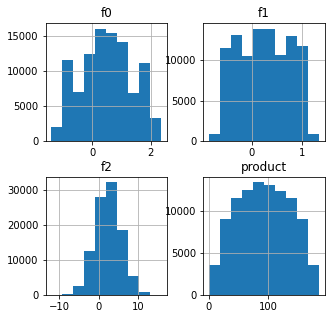

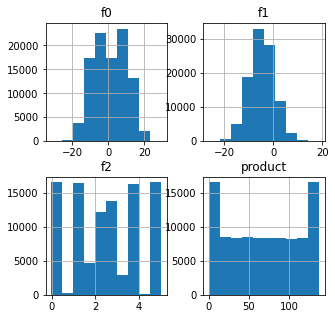

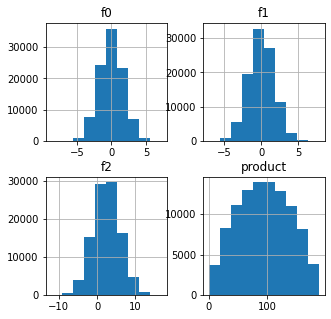

In [5]:
df_0.hist(figsize=(5, 5));
df_1.hist(figsize=(5, 5));
df_2.hist(figsize=(5, 5));

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

## Обучение и проверка модели

In [6]:
# 2.1.Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
features_0 = df_0.drop(['id', 'product'], axis=1)
target_0 = df_0['product']
features_1 = df_1.drop(['id', 'product'], axis=1)
target_1 = df_1['product']
features_2 = df_2.drop(['id', 'product'], axis=1)
target_2 = df_2['product']
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, 
                                                                                      random_state=12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, 
                                                                                      random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, 
                                                                                      random_state=12345)
# Посмотрим на результат.
display(features_train_0.shape) 
display(features_valid_0.shape) 
display(target_train_0.shape) 
display(target_valid_0.shape) 
display(features_train_1.shape) 
display(features_valid_1.shape) 
display(target_train_1.shape) 
display(target_valid_1.shape) 
display(features_train_2.shape) 
display(features_valid_2.shape) 
display(target_train_2.shape) 
target_valid_2.shape 

(75000, 3)

(25000, 3)

(75000,)

(25000,)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [7]:
# Проведем масштабирование.
pd.options.mode.chained_assignment = None
scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_0.fit(features_train_0) 
scaler_1.fit(features_train_1)
scaler_2.fit(features_train_2)
features_train_0 = scaler_0.transform(features_train_0) 
features_train_1 = scaler_1.transform(features_train_1)
features_train_2 = scaler_2.transform(features_train_2)
features_valid_0 = scaler_0.transform(features_valid_0)
features_valid_1 = scaler_1.transform(features_valid_1)
features_valid_2 = scaler_2.transform(features_valid_2)

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что scaler был обучен только на треине.
</div>

In [8]:
# Подберем гиперпараметры для модели линейной регрессии.
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()
grid_0 = GridSearchCV(model_0, parameters, cv=10)
grid_1 = GridSearchCV(model_1, parameters, cv=10)
grid_2 = GridSearchCV(model_2, parameters, cv=10)
grid_0.fit(features_train_0, target_train_0)
grid_1.fit(features_train_1, target_train_1)
grid_2.fit(features_train_2, target_train_2)
# # Выводим результат:
display(grid_0.best_params_)
display(grid_1.best_params_)
grid_1.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [9]:
# 2.2. Обучим модель и сделаем предсказания на валидационной выборке.
model_0 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
model_1 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
model_2 = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
model_0.fit(features_train_0, target_train_0) 
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

predictions_valid_0 = model_0.predict(features_valid_0)
predictions_valid_1 = model_1.predict(features_valid_1)
predictions_valid_2 = model_2.predict(features_valid_2)

In [10]:
# 2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
result_0 = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5
result_1 = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5
result_2 = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5
print('Средний запас предсказанного сырья в первом регионе:', df_0['product'].mean(), 'RMSE первой модели:', result_0)
print('Средний запас предсказанного сырья во втором регионе:', df_1['product'].mean(), 'RMSE второй модели:', result_1)
print('Средний запас предсказанного сырья в третьем регионе:', df_2['product'].mean(), 'RMSE третьей модели:', result_2)


Средний запас предсказанного сырья в первом регионе: 92.50000000000001 RMSE первой модели: 37.5794217150813
Средний запас предсказанного сырья во втором регионе: 68.82500000000002 RMSE второй модели: 0.8930992867756169
Средний запас предсказанного сырья в третьем регионе: 95.00000000000004 RMSE третьей модели: 40.02970873393434


<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

## Подготовка к расчёту прибыли

In [11]:
# 3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.
budget = 10000000000
#исследуем 500 точек
chosen_dots = 500 
#200 лучших
best_dots = 200 
#за 1000 баррель
income = 450000 

In [12]:
# 3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.
suffice_volume = budget / 200 / income
print('Средний объем нефти на точку -', suffice_volume, 'тыс. баррелей')
# Сравним полученный объём сырья со средним запасом в каждом регионе.
print('Средний запас фактичекой нефти на скважину в первом регионе', df_0['product'].mean())
print('Средний запас фактичекой нефти на скважину во втором регионе', df_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в третьем регионе', df_2['product'].mean())

Средний объем нефти на точку - 111.11111111111111 тыс. баррелей
Средний запас фактичекой нефти на скважину в первом регионе 92.50000000000001
Средний запас фактичекой нефти на скважину во втором регионе 68.82500000000002
Средний запас фактичекой нефти на скважину в третьем регионе 95.00000000000004


Вывод Анализ средних объемов на скважину для каждого региона следующий.

    Средний запас фактичекой нефти на скважину в 1 92.50000000000001
    Средний запас фактичекой нефти на скважину в 2 68.82500000000002
    Средний запас фактичекой нефти на скважину в 3 95.00000000000004

Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты.


<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

## Расчёт прибыли и рисков 

Напишим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [122]:
def oil_profit(target, probs, count):
    probs_sorted = probs.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return income * selected.sum() - budget

<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

Посчитаем риски и прибыль для каждого региона:

In [123]:
# 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [124]:
state = np.random.RandomState(12345)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    probs = pd.Series(probs).reset_index(drop=True)
    target = target.reset_index(drop=True)
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_dots)
        probs_sample = probs[target_sample.index]
        profit = oil_profit(target, probs_sample, best_dots)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

In [126]:
average_0, lower_0, upper_0, risk_0 = bootstrap_1000(target_valid_0, 
                                                     predictions_valid_0)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Средняя прибыль по региону = 391783677.38 тыс.руб.
95% доверительный интервал от -142969648.77 до 888569480.35 тыс.руб.
Процент риска 7.00%


In [127]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(target_valid_1, 
                                                     predictions_valid_1)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль по региону = 447095482.79 тыс.руб.
95% доверительный интервал от 81579096.29 до 836000872.56 тыс.руб.
Процент риска 1.20%


In [128]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(target_valid_2, 
                                                     predictions_valid_2)
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль по региону = 395329259.55 тыс.руб.
95% доверительный интервал от -89418725.54 до 887227452.26 тыс.руб.
Процент риска 5.70%


После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

ВЫВОД: Только второй регион отвечает необходимому условию по вероятности убытков меньше 2.5%. Его мы и рекомендуем для разработки.

<div class="alert alert-block alert-success">
<b>Успех:</b> С выбором региона согласен.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован